Classification Report Imbalanced
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.95      0.75      0.96      0.84      0.73   7598638
          1       0.53      0.75      0.95      0.62      0.84      0.70    586706

avg / total       0.95      0.93      0.76      0.94      0.84      0.72   8185344

TruePositive: 7204656, FalsePositive: 146800, FalseNegative: 393982, TrueNegative:439906
Accuracy: 0.933932892740977, Sensitivity: 0.9481509712661664, Specificity: 0.7497895027492475
F1_score: 0.6193268449676684


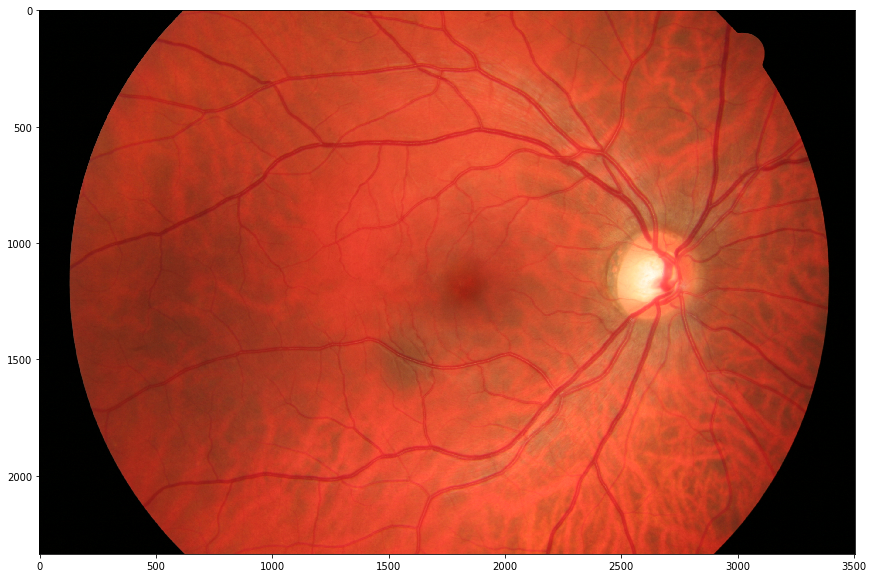

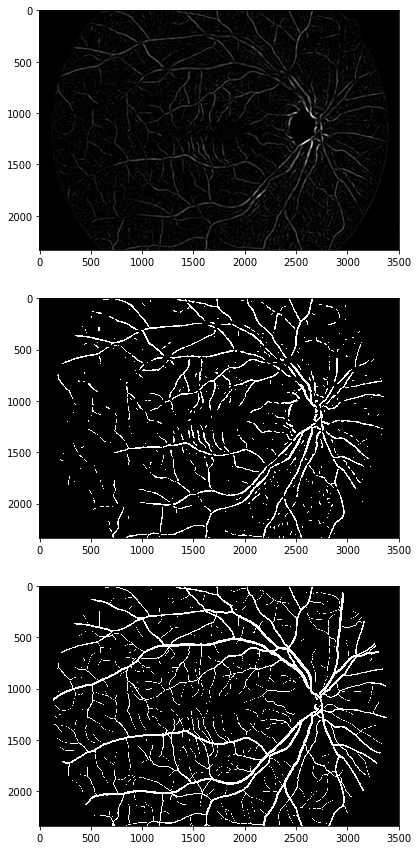

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output
from ImageLoader import ImageLoader
import ImageLoader as loader
import copy
from SimpleImageProcessor import SimpleImageProcessor
from matplotlib import pylab as plt
plt.rcParams["figure.figsize"] = (15,10)

imageLoader = ImageLoader();
imageProcessor = SimpleImageProcessor();

def selectImage(x):
    imageLoader.load_image(x)

def process(button):
    clear_output(wait=True)
    display(hBox1)
    imageProcessor.load_base_image(imageLoader.selected_image)
    imageProcessor.load_expert_image(imageLoader.corresponding_image)
    imageProcessor.process_image()
    display_input_image()
    display_output_images()
    
    #here some result labels has been prepared in VBox
    label1 = widgets.Label(value="example text1")
    label2 = widgets.Label(value="example text2")
    label3 = widgets.Label(value="example text3")
    vBox1 = widgets.VBox([label1, label2, label3])
    display(vBox1)
    
    
def display_input_image():
    plt.imshow(imageProcessor.base_image)
    
def display_output_images():
    fig, ax = plt.subplots(3,1, figsize=(15,15))
    ax[0].imshow(imageProcessor.frangied_image, 'gray')
    ax[1].imshow(imageProcessor.binary_image, 'gray')
    ax[2].imshow(imageProcessor.expert_image, 'gray')
    
selectedImage = interactive(selectImage, x=widgets.Dropdown(options=imageLoader.base_images, description='Obraz:'));
processButton = widgets.Button(description='Przetwarzaj');
processButton.on_click(process);
hBox1 = widgets.HBox([selectedImage, processButton])


display(hBox1)
